In [109]:
import pandas as pd

from tqdm.notebook import tqdm
import sys
import os
import re
from glob import glob
from time import sleep

prefix = os.getcwd().split("jdi-qasp-ml")[0]
sys.path.append(os.path.join(prefix, "jdi-qasp-ml"))

total_df = pd.read_csv(f'{os.path.join(prefix, "jdi-qasp-ml")}/data/other/total_df_for_nlp_model_prepared.csv')

In [110]:
total_labeled = total_df[~total_df.LABEL.isna()]

In [141]:
replace_values = {"mui":"", "root":"", "jss":""}
def multiple_replace(target_str):
    for i, j in replace_values.items():
        target_str = target_str.replace(i, j)
        target_str = re.sub(' +', ' ', target_str)
    return target_str

In [142]:
total_labeled["final_string"] = total_labeled["final_string"].apply(multiple_replace)

/var/folders/n6/xlg_j8tx7xzdv6qgxc7hwb680000gp/T/ipykernel_9468/2231488199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_labeled["final_string"] = total_labeled["final_string"].apply(multiple_replace)


In [143]:
total_labeled

,site,element_id,parent_id,final_string,LABEL,countvec
112,site-36,6533486216559833460616205753,6853729894559833464426361645,span slider slider color primary span slider r...,slider,"[label, color, primary, input, thumb, value, t..."
126,site-36,7159805062559833463754904441,5374694376559833469520811780,div avatar avatar square avatar group avatar a...,avatar,"[group, div, color, square, avatar, default]"
127,site-36,9909531984559833468390915811,5374694376559833469520811780,div avatar avatar square avatar group avatar a...,avatar,"[svg, group, div, color, path, square, avatar,..."
128,site-36,8242725098559833466945321206,9909531984559833468390915811,svg svg icon path,icon,"[svg, icon, path]"
130,site-36,3265653768559833466368332963,5374694376559833469520811780,div avatar avatar square avatar group avatar a...,avatar,"[group, div, color, square, avatar, default]"
...,...,...,...,...,...,...
739881,site-13,7881423377559287766790965778,3095273263559287765948203206,ul list menu list list padding menu li button ...,menu,"[, li, item, span, ripple, ul, touch, button, ..."
739889,site-13,7029154749559287768228884107,0436397204559287751212596967,div popover presentation div div div paper pop...,popover,"[p, div, typography, popover, paper, jss, pres..."
739893,site-13,1726539264559287761833942916,9047366719559287768136876884,p typography typography body,typography,"[jss, p, typography, body]"
739895,site-13,8293726446559287768833831671,0436397204559287751212596967,div popover presentation div div div paper pop...,popover,"[p, div, typography, popover, paper, jss, pres..."


In [144]:
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
)

In [145]:
total_labeled['countvec'] = total_labeled.final_string.apply(lambda x: list(set(x.split(" "))))

/var/folders/n6/xlg_j8tx7xzdv6qgxc7hwb680000gp/T/ipykernel_9468/3046645871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_labeled['countvec'] = total_labeled.final_string.apply(lambda x: list(set(x.split(" "))))


In [146]:
import itertools
import operator

In [147]:
counts = total_labeled.groupby("LABEL")["countvec"].agg(lambda x:" ".join(list(itertools.chain.from_iterable(x))))
counts

LABEL
accordion            p details div expanded typography collapse acc...
alert                svg div font path filled size inherit paper ic...
app-bar              svg primary button icon start elevation span b...
avatar               group div color square avatar default svg grou...
backdrop             svg progress div indeterminate backdrop circul...
badge                svg color primary path right origin badge icon...
bottom-navigation    label svg  div wrapper path navigation touch b...
box                   span box  span box  span box  span box  span ...
breadcrumbs          breadcrumbs nav color typography ol p li prima...
button               label  group primary horizontal touch button g...
button-group         label  group div primary horizontal touch butt...
card                  title size button span text base div typograp...
checkbox             label svg color indeterminate  input path touc...
chip                 label span div chip label color div primary ch...


In [148]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

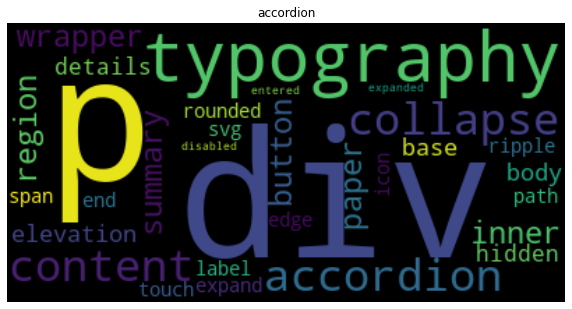

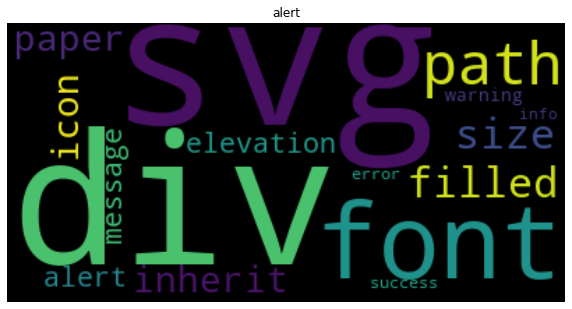

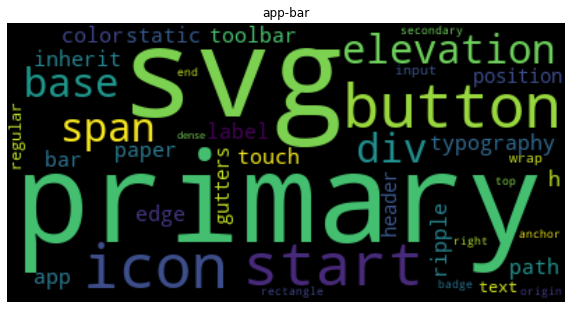

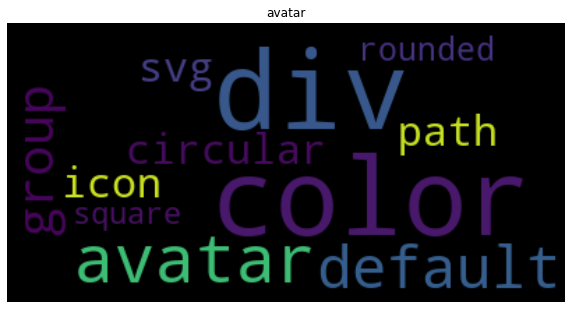

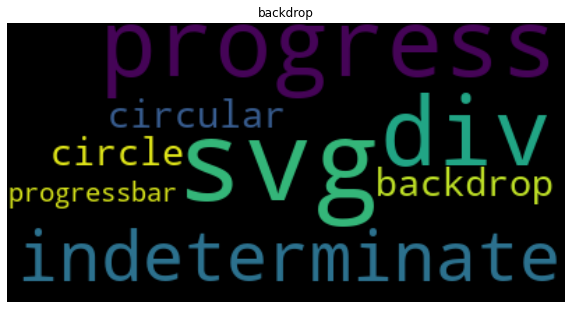

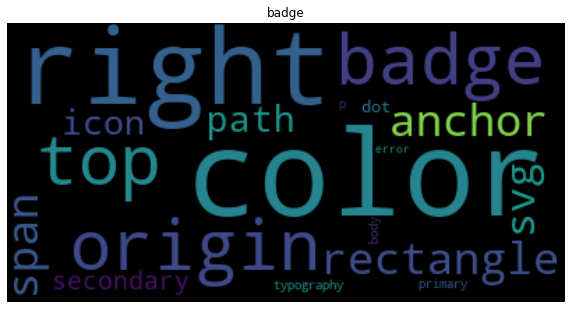

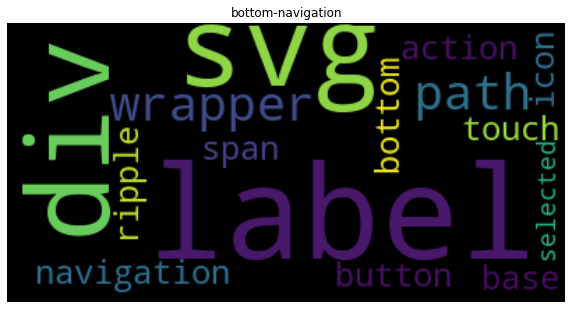

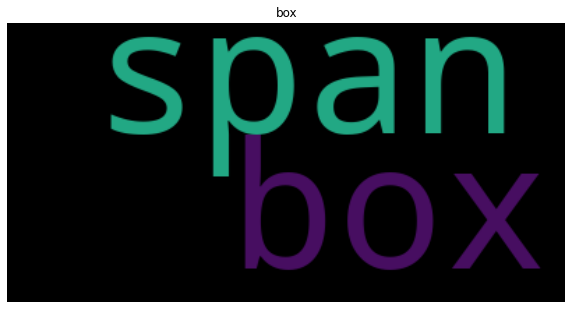

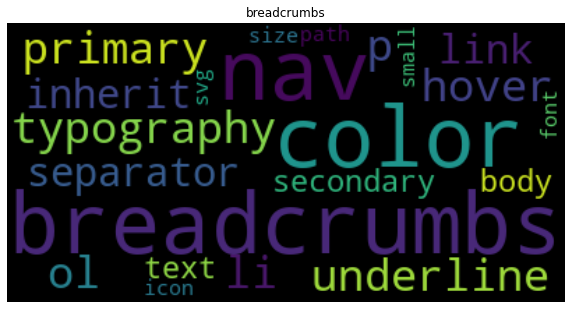

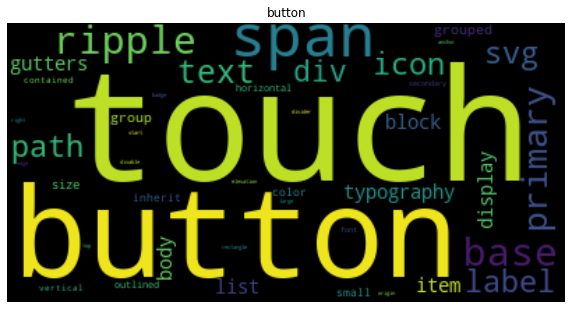

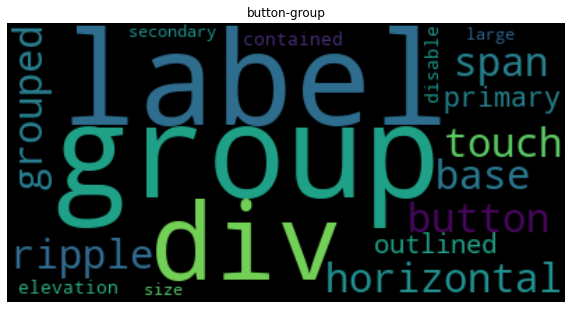

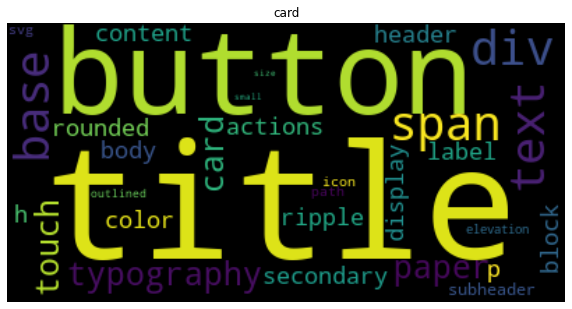

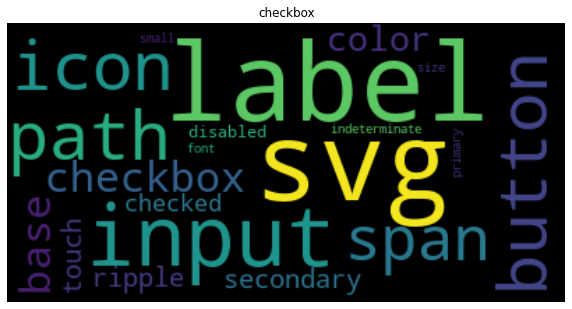

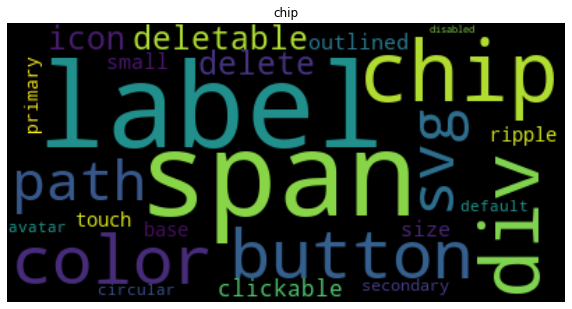

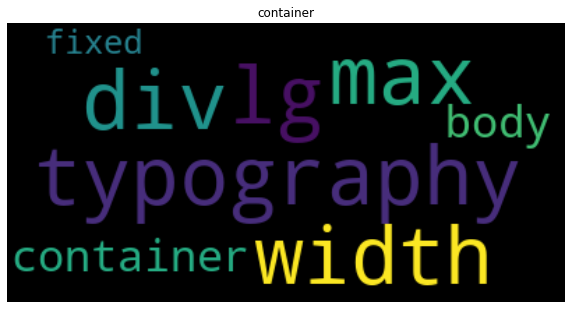

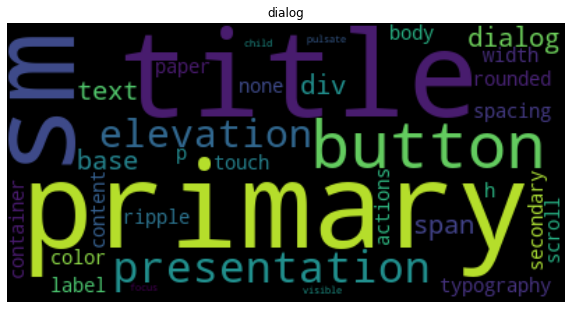

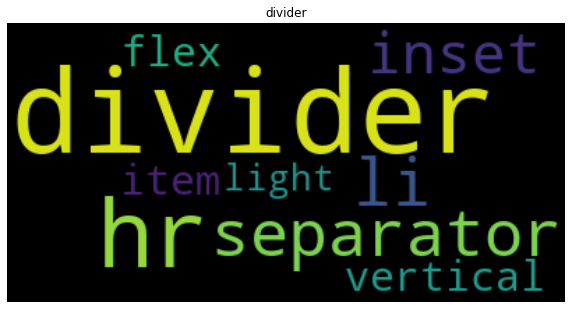

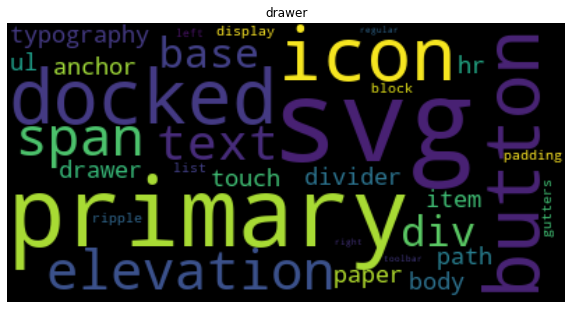

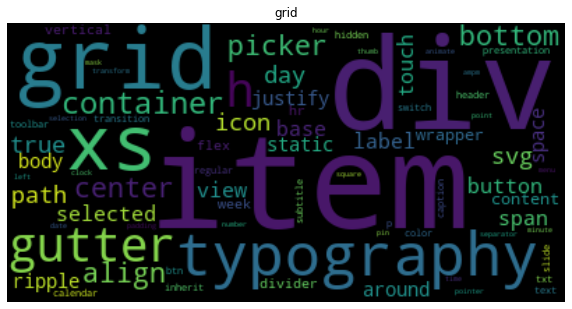

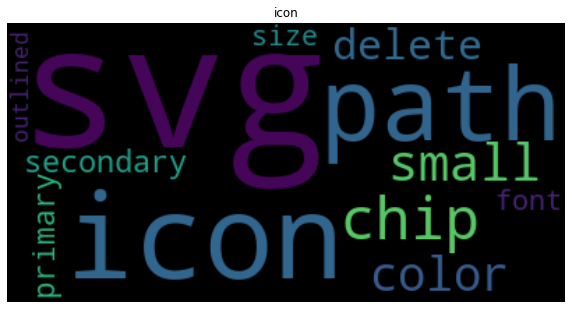

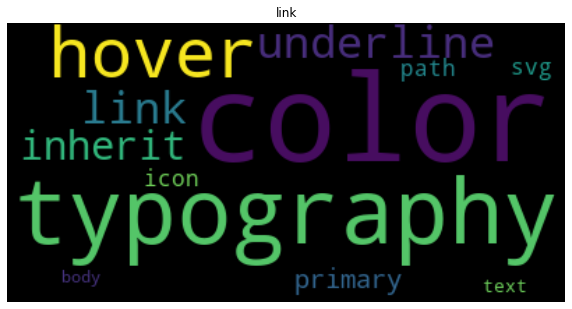

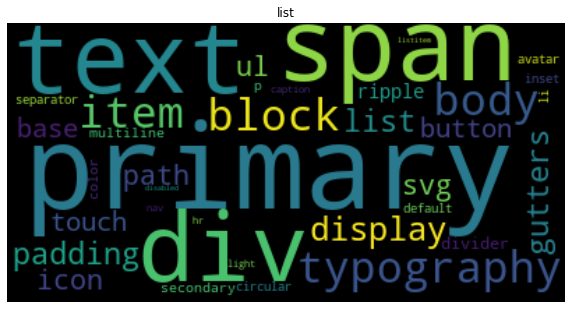

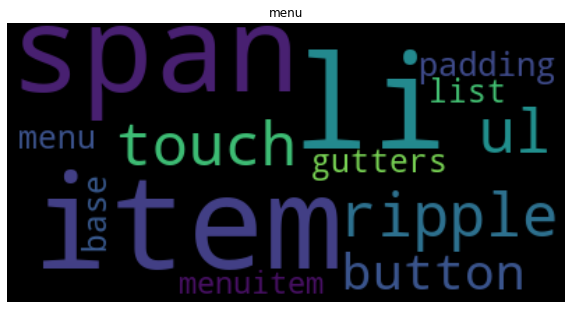

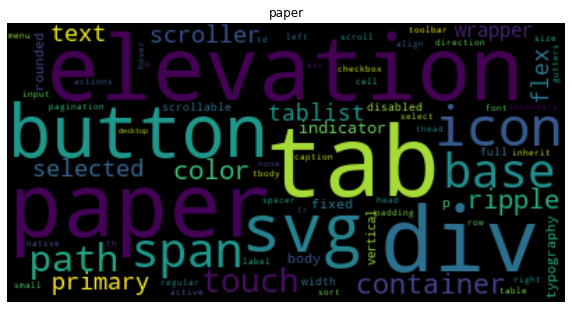

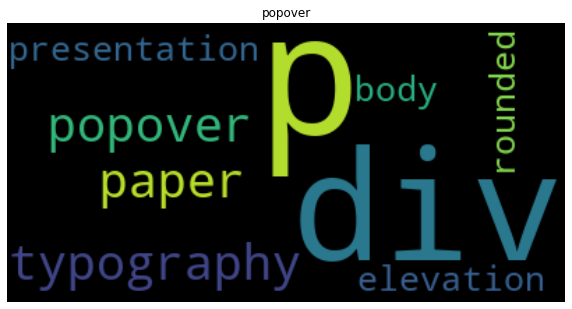

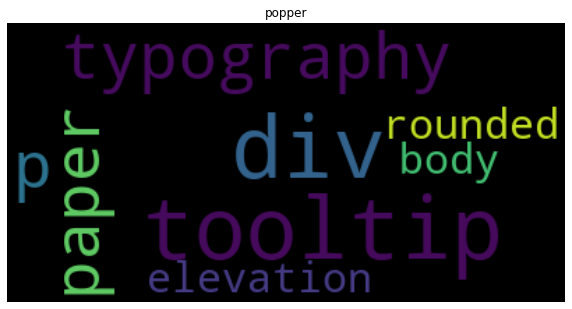

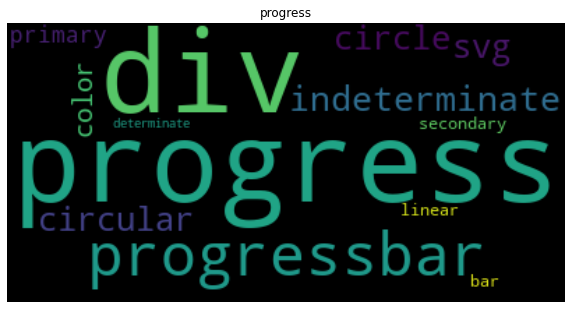

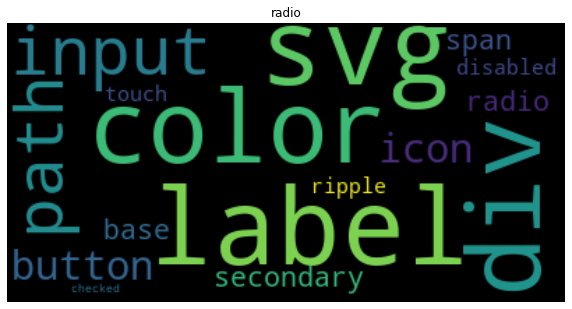

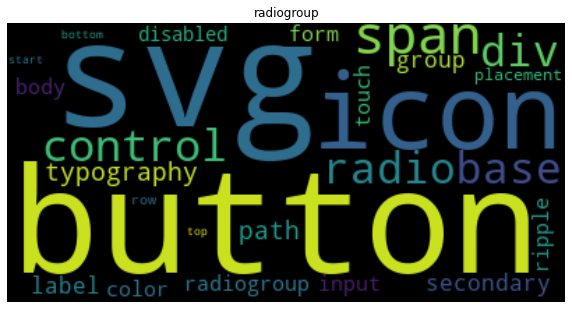

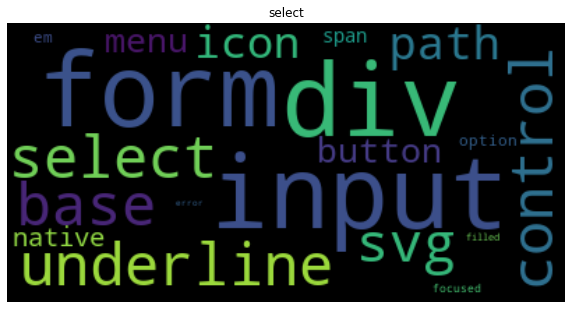

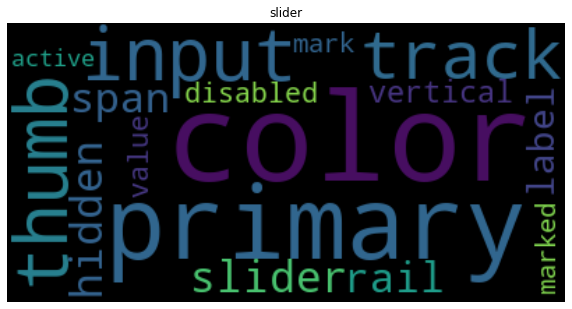

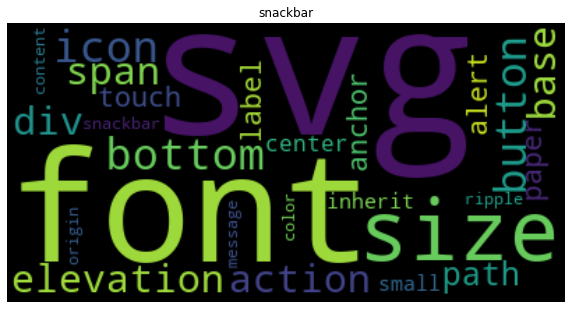

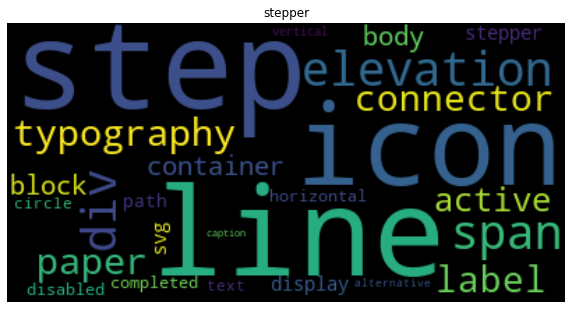

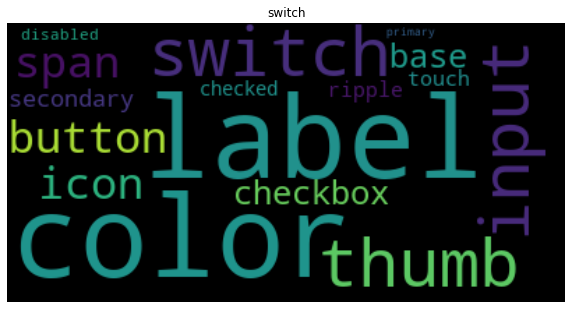

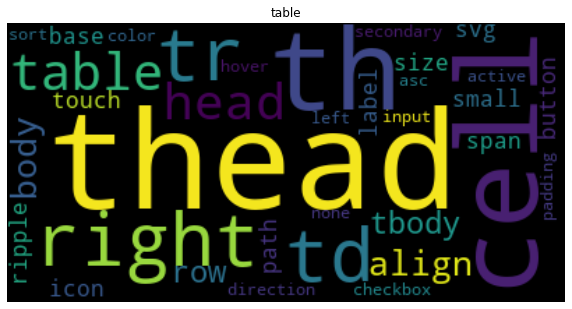

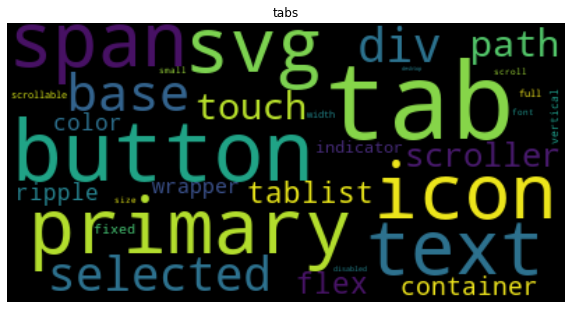

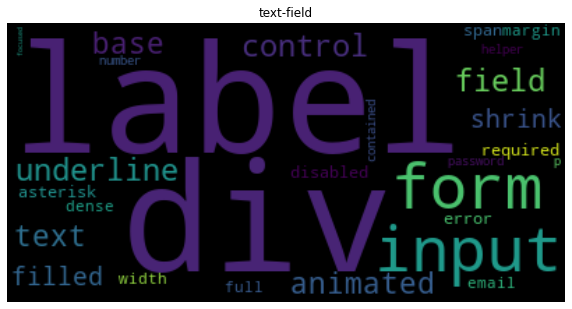

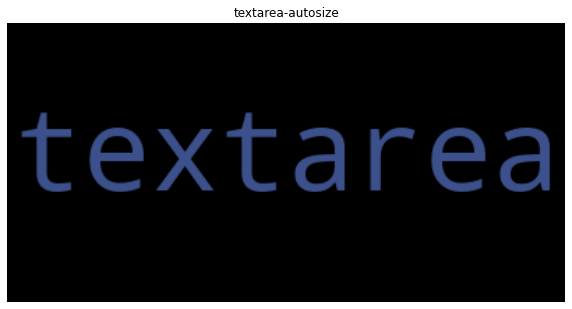

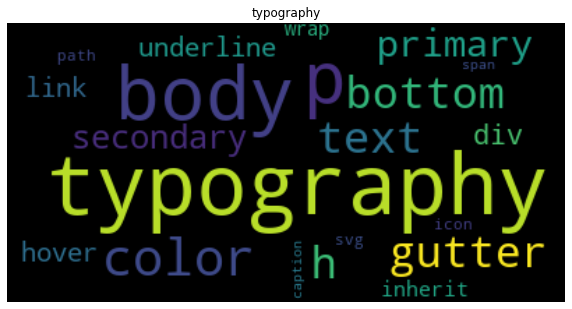

In [150]:
for k in counts.keys():
    wc = WordCloud(collocations=False).generate(counts[k])
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(k)
    plt.show()

In [119]:
pd.DataFrame(dict_20)["button"].dropna()

root          13786.0
body           6352.0
typography     6352.0
div            6608.0
base          13786.0
button        13786.0
mui           13786.0
label          7434.0
svg            7631.0
touch         13786.0
path           7631.0
ripple        13786.0
span          13786.0
icon           7631.0
inherit        1596.0
size           1933.0
color          1596.0
primary       10438.0
gutters        6352.0
group          2354.0
text           8746.0
small          1573.0
item           6352.0
block          6352.0
display        6352.0
list           6352.0
grouped        2354.0
horizontal     1330.0
outlined       1330.0
vertical       1024.0
Name: button, dtype: float64